In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# scale image to [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# reshaping of image(28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test smaples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test smaples


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [6]:
batch_size = 100
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
540/540 [==============================] - 13s 24ms/step - loss: 0.2843 - accuracy: 0.9164 - val_loss: 0.0755 - val_accuracy: 0.9790
Epoch 2/25
540/540 [==============================] - 13s 24ms/step - loss: 0.0880 - accuracy: 0.9730 - val_loss: 0.0631 - val_accuracy: 0.9822
Epoch 3/25
540/540 [==============================] - 13s 24ms/step - loss: 0.0658 - accuracy: 0.9795 - val_loss: 0.0485 - val_accuracy: 0.9870
Epoch 4/25
540/540 [==============================] - 14s 25ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0455 - val_accuracy: 0.9870
Epoch 5/25
540/540 [==============================] - 14s 26ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0389 - val_accuracy: 0.9900
Epoch 6/25
540/540 [==============================] - 14s 25ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.0358 - val_accuracy: 0.9897
Epoch 7/25
540/540 [==============================] - 14s 25ms/step - loss: 0.0346 - accuracy: 0.9894 - val_loss: 0.0390 - val_accuracy:

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1] * 100, "%")

Test loss: 0.028322232887148857
Test accuracy: 99.19999837875366 %


In [9]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [12]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [13]:
# predictions

predictions = new_model.predict([x_test])
print(predictions)

[[3.1811850e-14 6.7769880e-14 5.6438219e-09 ... 1.0000000e+00
  5.3265297e-13 5.2760449e-09]
 [2.2723743e-09 1.4218622e-07 9.9999273e-01 ... 1.0164302e-15
  3.1581906e-09 3.4617905e-14]
 [4.4316106e-11 9.9996102e-01 2.3675717e-08 ... 1.5263215e-05
  5.3552185e-07 1.5220065e-08]
 ...
 [1.4691653e-20 3.1421267e-14 3.4558081e-20 ... 7.6005799e-12
  1.5581679e-10 2.6948863e-11]
 [5.5481787e-12 2.2118353e-23 3.1556163e-17 ... 4.1637651e-19
  3.6837812e-07 1.4934009e-11]
 [1.5531999e-11 5.0270640e-18 1.0842214e-11 ... 1.5843291e-19
  1.3032844e-10 2.0725301e-17]]


In [17]:
print(np.argmax(predictions[33]))

4


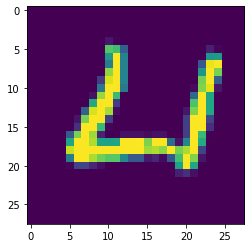

In [19]:
plt.imshow(x_test[33])
plt.show()

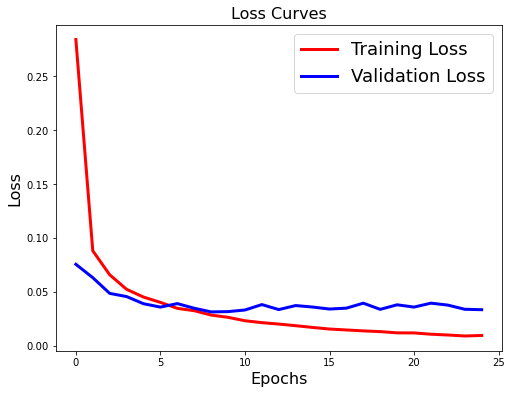

In [29]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training Loss','Validation Loss'], fontsize = 18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

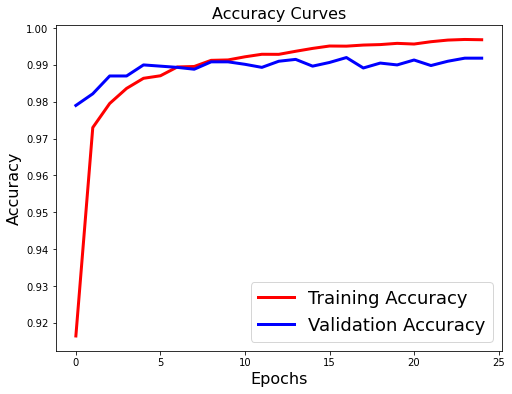

In [32]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'], fontsize = 18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()